# About Pushing Decision Boundary

In [1]:
%matplotlib inline
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Creating Dataset

In [31]:
iris = datasets.load_iris()
X = iris.data[:,[0,2]]
y = iris.target

### Transforming problem into a binary one

In [32]:
y[y == 2] = 0

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Non-linear model

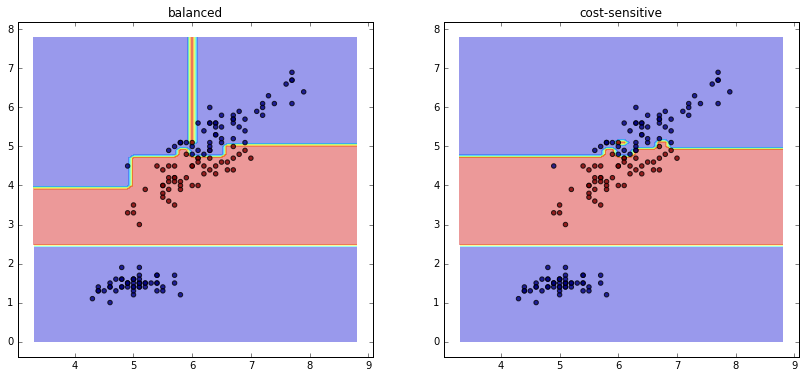

In [103]:
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier(class_weight={1:2000000})

names = ["balanced", "cost-sensitive"]

Z = []
plt.figure(figsize=(14,6))
for name, model_i in zip(names, enumerate([clf1, clf2])):
    plt.subplot(1,2, model_i[0]+1)
    model_i[1].fit(X, y)
    Z.append(model_i[1].predict(np.c_[xx.ravel(), yy.ravel()]))
    Z[model_i[0]] = Z[model_i[0]].reshape(xx.shape)
    plt.contourf(xx, yy, Z[model_i[0]], alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c = y, alpha=0.8)
    plt.title(name)
    
    
plt.show()

In [104]:
Z_nw = Z[0]
Z_w = Z[1]
print(len(Z_w[Z_w==1])/(len(Z_nw[Z_nw==1]) + 1))

1.076555023923445


### Linear Model

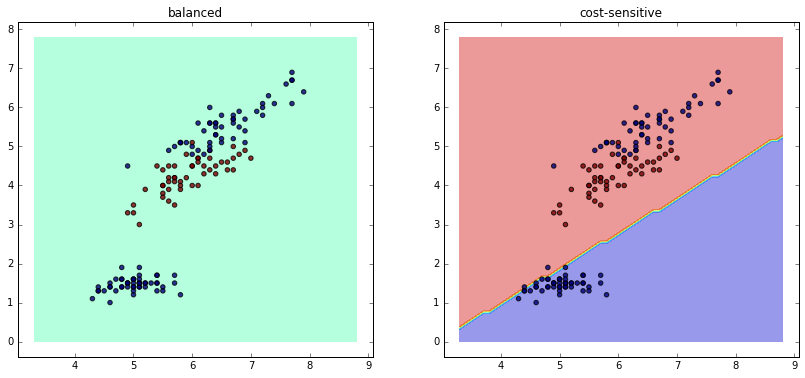

In [100]:
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='linear',class_weight={1:2000000})

names = ["balanced", "cost-sensitive"]

Z = []
plt.figure(figsize=(14,6))
for name, model_i in zip(names, enumerate([clf1, clf2])):
    plt.subplot(1,2, model_i[0]+1)
    model_i[1].fit(X, y)
    Z.append(model_i[1].predict(np.c_[xx.ravel(), yy.ravel()]))
    Z[model_i[0]] = Z[model_i[0]].reshape(xx.shape)
    plt.contourf(xx, yy, Z[model_i[0]], alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c = y, alpha=0.8)
    plt.title(name)
       
plt.show()

In [102]:
Z_nw = Z[0]
Z_w = Z[1]
print(len(Z_w[Z_w==1])/(len(Z_nw[Z_nw==1]) + 1))

2819.0


### Non-Linear Model

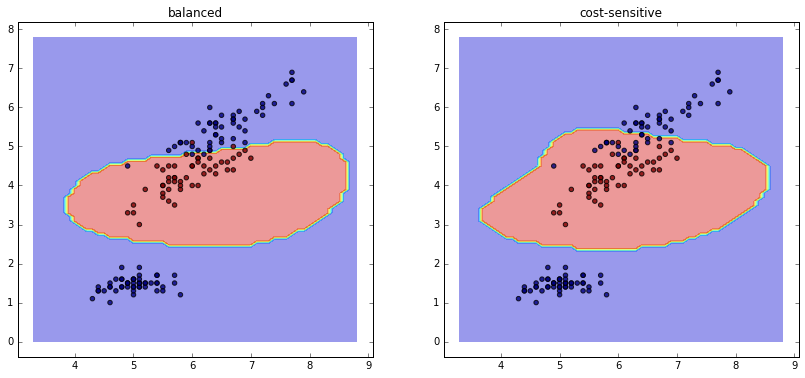

In [93]:
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

clf1 = SVC(kernel='rbf')
clf2 = SVC(kernel='rbf',class_weight={1:2000000})

names = ["balanced", "cost-sensitive"]
Z = []
plt.figure(figsize=(14,6))
for name, model_i in zip(names, enumerate([clf1, clf2])):
    plt.subplot(1,2, model_i[0]+1)
    model_i[1].fit(X, y)
    Z.append(model_i[1].predict(np.c_[xx.ravel(), yy.ravel()]))
    Z[model_i[0]] = Z[model_i[0]].reshape(xx.shape)
    plt.contourf(xx, yy, Z[model_i[0]], alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c = y, alpha=0.8)
    plt.title(name)
    
plt.show()

In [86]:
np.random.choice([True, False], len(y))

array([False, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False,

In [99]:
Z_nw = Z[0]
Z_w = Z[1]
print(len(Z_w[Z_w==1])/len(Z_nw[Z_nw==1]))

1.1177062374245472
